### week 10

# Logistic Regression

- link function
- logistic regression
- generalized linear models (GLMs)

In [1]:
import pods
import notebook as nb
import mlai
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline

### Review and Preview

- last week we saw class conditional distributions, $p(\mathbf{x}_i | y_i, \boldsymbol{\theta})$
- Bayes classifier + naive Bayes model specified a joint distribution $p(\mathbf{X}, \mathbf{y})$
- Bayes rule was used to compute the posterior probability of a class membership
- this week we study direct estimation of probability of a class membership
- generalised linear models (GLMs) are also introduced

### Log Odds

The odds are defined as the ratio of the probability of a positive outcome, to the probability of a negative outcome.
- odds are calculated as $\frac{\pi}{1-\pi}$ where $\pi$ denotes the probability of a positive outcome
- as a probability is always between zero and one, the odds are always between $0$ and $\infty$ (odds can never be negative)
- logarithm of odds maps them to $-\infty$ to $\infty$

Wikipedia: [Odds](https://en.wikipedia.org/wiki/Odds)

### Link Function

The **logit function** is used as a link function $g^{-1}(\cdot)$ :
$$
  g^{-1}(\pi_i) = \log\frac{\pi_i}{1-\pi_i}
$$

- recall that, for standard regression, we had $f(\mathbf{x}_i) = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i)$

- for classification we perform a **logistic regression** of the form:
$$g^{-1}(\pi_i) = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i)$$

Wikipedia: [Logit](http://en.wikipedia.org/wiki/Logit)

### Inverse Link Function

We write $\pi_i$ in terms of the inverse link function $g(\cdot)$ :
$$
  \pi(\mathbf{x}_i) = g\left( \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i) \right)
$$
where $\pi_i \buildrel\triangle\over = \pi(\mathbf{x}_i)$, which is the probability of positive outcome for the $i^{th}$ data point.

- $\pi(\mathbf{x}) = g\left( \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}) \right)$ for a set of data points

Wikipedia: [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)

### Logistic Function

Logistic function (or **sigmoid function**) squashes real line to between zero and one:
$$
  g(f_i) = \frac{1}{1+\exp(-f_i)}
$$

Wikipedia: [Logistic function](http://en.wikipedia.org/wiki/Logistic_function)

(next graph) plot for a logistic function

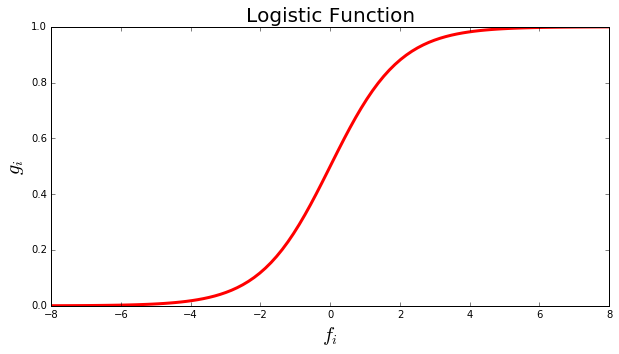

In [2]:
fig, ax = plt.subplots(figsize=(10,5))
f = np.linspace(-8, 8, 100)
g = 1/(1+np.exp(-f))

ax.plot(f, g, 'r-', linewidth=3)
ax.set_title('Logistic Function', fontsize=20)
ax.set_xlabel('$f_i$', fontsize=20)
ax.set_ylabel('$g_i$', fontsize=20)
plt.savefig('./diagrams/logistic.svg')

### Prediction Function

By replacing the inverse link with the **logistic function**, we rewrite $\pi$ as a function of the input and the parameter vector:
$$
  \pi(\mathbf{x},\mathbf{w}) = \frac{1}{1 + \exp\left( -\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}) \right)}
$$

Process for **logistic regression**:
1. (as we did for linear regression) compute the output of a standard linear basis function composition, $\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})$
2. apply the **inverse link function**, $g\left( \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}) \right)$
3. use this value in a **Bernoulli distribution** to form the likelihood

### Likelihood for Bernoulli

Recall the Bernoulli distribution:
$$
  p(y_i | \mathbf{x}, \mathbf{w}) = \pi_i^{y_i} (1-\pi_i)^{1-y_i}
$$
Conditional independence of data means
$$
  p(\mathbf{y} | \mathbf{x}, \mathbf{w})
  = \prod_{i=1}^n P(y_i | \mathbf{w}, \mathbf{x}_i)
  = \prod_{i=1}^n \pi_i^{y_i} (1-\pi_i)^{1-y_i}
$$
whose log likelihood is
$$
  \log P(\mathbf{y} | \mathbf{x}, \mathbf{w}) = \sum_{i=1}^n y_i \log\pi_i + \sum_{i=1}^n (1-y_i)\log(1-\pi_i)
$$

### Objective Function

Note that $\pi_i = g\left( \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i) \right)$ where $g(\cdot)$ is the **inverse link function**.

The objective function is the negative of the log likelihood:
$$
  E(\mathbf{w}) = -\sum_{i=1}^n y_i \log g\left( \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i) \right) - \sum_{i=1}^n (1-y_i) \log\left( 1 - g\left( \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i) \right) \right)
$$

### Gradient

The gradient of the inverse link function $g(f_i) = (1 + \exp(-f_i))^{-1}$ is
$$
  \frac{\partial g(f_i)}{\partial f_i} = \exp(-f_i)(1 + \exp(-f_i))^{-2} = \frac{1}{1 + \exp(-f_i)} \frac{\exp(-f_i)}{1 + \exp(-f_i)} = g(f_i)(1-g(f_i))
$$

Let $f_i = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})$, and the gradient of the objective function is
\begin{align*}
  \frac{\partial E(\mathbf{w})}{\partial \mathbf{w}}
  & = -\sum_{i=1}^n \frac{y_i}{g(f_i)} \frac{\partial g(f_i)}{\partial f_i} \frac{\partial f_i}{\partial \mathbf{w}} + \sum_{i=1}^n \frac{1-y_i}{1 - g(f_i)} \frac{\partial g(f_i)}{\partial f_i} \frac{\partial f_i}{\partial \mathbf{w}} \\
  & = -\sum_{i=1}^n y_i \left( 1 - g\left( \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})\right) \right) \boldsymbol{\phi}(\mathbf{x}_i) + \sum_{i=1}^n (1-y_i) g\left( \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}) \right) \boldsymbol{\phi}(\mathbf{x}_i)
\end{align*}
We can **not** find a stationary point of the objective function **analytically**.

### Numerial Optimisation

Failing analytically, optimisation has to proceed by **numerical methods**. 
- Newton's method
- gradient based optimization methods

Similarly to matrix factorisation, **stochastic gradient descent** works well for large data.

Wikipedia:
[Newton's method](http://en.wikipedia.org/wiki/Newton%27s_method) /
[Gradient method](http://en.wikipedia.org/wiki/Gradient_method)

### Example: Ad Matching for Facebook

Logistic regression is used in many internet companies.

(eg) ad matching for Facebook
- millions of advertisers
- billions of users

How do you choose who to show what?
- logistic regression is used in combination with decision trees
- reference by [He et al.](http://www.herbrich.me/papers/adclicksfacebook.pdf)

### Generalized Linear Models (GLMs)

Logistic regression is part of a family known as **generalized linear models**.

They all take the form:
$$
  g^{-1}(f_i(x)) = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i)
$$

Another example is **Poisson regression**.

Wikipedia:
[Generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) /
[Poisson regression](https://en.wikipedia.org/wiki/Poisson_regression)

### Poisson Distribution (I)

The Poisson distribution is one of the most commonly observed distributions in both natural and social environments.
- it is fundamental to the **queueing theory**
- under certain conditions the number of occurrences of a certain event during a given period or in a specified region of space follows the Poisson distribution

Wikipedia: [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)

### Poisson Distribution (II)

Poisson distribution is given by
$$
  p(y) = \frac{\lambda^y}{y!}\exp(-y)
$$
- $y$ is a non-negative integer
- $\lambda$ is a rate parameter that can be thought of as the number of arrivals per unit time

(next graph) Poisson distribution with $\lambda = 1, 3, 10$

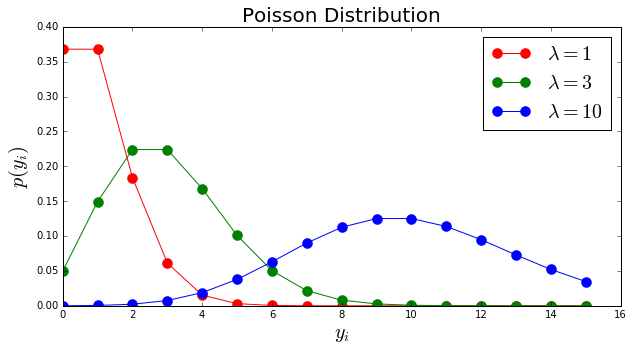

In [3]:
from scipy.stats import poisson
fig, ax = plt.subplots(figsize=(10,5))
y = np.asarray(range(0, 16))
p1 = poisson.pmf(y, mu=1.)
p3 = poisson.pmf(y, mu=3.)
p10 = poisson.pmf(y, mu=10.)

ax.plot(y, p1, 'r.-', markersize=20, label='$\lambda=1$')
ax.plot(y, p3, 'g.-', markersize=20, label='$\lambda=3$')
ax.plot(y, p10, 'b.-', markersize=20, label='$\lambda=10$')
ax.set_title('Poisson Distribution', fontsize=20)
ax.set_xlabel('$y_i$', fontsize=20)
ax.set_ylabel('$p(y_i)$', fontsize=20)
ax.legend(fontsize=20)
plt.savefig('./diagrams/poisson.svg')

### Poisson Regression

Poisson regression makes a function of space/time:
$$
  \log\lambda(\mathbf{x},t) = \mathbf{w}_x^\top \boldsymbol{\phi}_x(\mathbf{x}) + \mathbf{w}_t^\top \boldsymbol{\phi}_t(t)
$$

- known as a **log linear** or **log additive model**
- the link function is a logarithm

Rewrite this function as $\log \lambda(\mathbf{x}, t) = f_x(\mathbf{x}) + f_t(t)$ .

- be careful though ... a log additive model is really multiplicative
- the above is equivalent to $\lambda(\mathbf{x}, t) = \exp(f_x(\mathbf{x}))\exp(f_t(t))$